In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

#Plots:
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# filepath = "Enron_Kaggle_dataset/Enron_2001.csv" ### VErsion for testing code is running
# filepath = "Enron_Kaggle_dataset/email_data_updated.csv"
filepath = "Enron_Kaggle_dataset/score.csv"


# Read the data into a pandas dataframe called emails
df = pd.read_csv(filepath)

#Convert date column to datetime 

df["Date"] = pd.to_datetime(df["Date"])

### Adding classification by year to dataframe:

df['year'] = pd.DatetimeIndex(df['Date']).year

### Selection of year of interest:
year_of_interest =2001
df = df.loc[df['year'] == year_of_interest]

In [3]:
df.head(5)

email-body  \
0                              Here is our forecast     
1    Traveling to have a business meeting takes th...   
17   Tim,  mike grigsby is having problems with ac...   
28   Reagan,  Just wanted to give you an update.  ...   
39   Jim,  Is there going to be a conference call ...   

                       From employee                      Date Subject  \
0   phillip.allen@enron.com  allen-p 2001-05-14 23:39:00+00:00     NaN   
1   phillip.allen@enron.com  allen-p 2001-05-04 20:51:00+00:00     Re:   
17  phillip.allen@enron.com  allen-p 2001-05-04 18:26:00+00:00     NaN   
28  phillip.allen@enron.com  allen-p 2001-05-03 22:57:00+00:00     NaN   
39  phillip.allen@enron.com  allen-p 2001-05-02 19:36:00+00:00     NaN   

      X-Folder                         To X-cc X-Origin  year  ...     anger  \
0   'sent mail       tim.belden@enron.com  NaN  Allen-P  2001  ...  0.100000   
1   'sent mail    john.lavorato@enron.com  NaN  Allen-P  2001  ...  0.094070   
17  'sent mail  tim.heizenrader@enron.com  NaN  Allen-P  2001  ...  0.104478   
28  'sent mail         rlehmann@yahoo.com  NaN  Allen-P  2001  ...  0.105058   
39  'sent mail    james.steffes@enron.com  NaN  Allen-P  2001  ...  0.087912   

     anticip     trust  surprise  positive  negative   sadness   disgust  \
0   0.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
1   0.096115  0.106339  0.089980  0.114519  0.104294  0.100204  0.096115   
17  0.104478  0.104478  0.089552  0.104478  0.104478  0.089552  0.089552   
28  0.101167  0.101167  0.097276  0.105058  0.105058  0.105058  0.093385   
39  0.087912  0.120879  0.087912  0.131868  0.109890  0.076923  0.098901   

         joy  topemotion  
0   0.100000        fear  
1   0.100204    positive  
17  0.104478        fear  
28  0.093385       anger  
39  0.087912    positive  

[5 rows x 23 columns]

In [4]:
# df[df['To'] == 'jennifer.burns@enron.com'].head(30)
df[df['To'] == 'jeffery.fawcett@enron.com'].head(30)


email-body  \
35105   Thanks.  Let me try to rally the troops.  Get...   
35322  Bcc: kevin.hyatt@enron.com, lon.stanton@enron....   
35677  X-Origin: DASOVICH-J X-FileName: jdasovic.nsf ...   
35679  X-Origin: DASOVICH-J X-FileName: jdasovic.nsf ...   
35740   Hmm. Interesting.  Thanks for the info.  Do w...   
35765  X-Origin: DASOVICH-J X-FileName: jdasovic.nsf ...   
35772   Thanks much.  Sorry for being such a loser wh...   
35843  X-Origin: DASOVICH-J X-FileName: jdasovic.nsf ...   
36044                            Lemme know how it goes.   
36088   This is unreal.  If TW ain't on the A list, w...   
36092   I'll look at it and get back to you first thi...   
36133  susan.scott@enron.com, tk.lohman@enron.com X-F...   
36292  X-FileName: jdasovic.nsf  Hmmm. FYI.  Dear old...   
36923   Yes (sort of).  I'm in Houston.  Up on 47.  W...   
37520   I'll be on the call.  Hope all's well on your...   
37597  X-bcc: X-Folder: \Jeff_Dasovich_June2001\Notes...   
37879   FYI.  Can you join? ----- Forwarded by Jeff D...   
37908  X-Origin: DASOVICH-J X-FileName: jdasovic.nsf ...   
38154  X-Origin: DASOVICH-J X-FileName: jdasovic.nsf ...   
44738                 Man, you ain't kiddin'.  Jeez.....   
46010   Thank you very much for including me on this....   
46147             Thanks a million, buddy.  Very useful.   
46286   Do we want to position this as "let the marke...   
54714  Bcc: kevin.hyatt@enron.com, lon.stanton@enron....   
54779  susan.scott@enron.com, tk.lohman@enron.com X-F...   
54856  X-bcc: X-Folder: \Jeff_Dasovich_June2001\Notes...   
73114   This sounds great--I take it that they are st...   
73202   Thanks Jeff!  One big benefit is that I'll be...   
73836   This sounds great--I take it that they are st...   
73920   Thanks Jeff!  One big benefit is that I'll be...   

                          From    employee                      Date  \
35105  jeff.dasovich@enron.com  dasovich-j 2001-03-20 17:20:00+00:00   
35322  jeff.dasovich@enron.com  dasovich-j 2001-03-23 18:41:00+00:00   
35677  jeff.dasovich@enron.com  dasovich-j 2001-04-06 10:30:00+00:00   
35679  jeff.dasovich@enron.com  dasovich-j 2001-04-06 11:17:00+00:00   
35740  jeff.dasovich@enron.com  dasovich-j 2001-04-09 10:20:00+00:00   
35765  jeff.dasovich@enron.com  dasovich-j 2001-04-09 13:13:00+00:00   
35772  jeff.dasovich@enron.com  dasovich-j 2001-04-09 13:28:00+00:00   
35843  jeff.dasovich@enron.com  dasovich-j 2001-04-10 13:56:00+00:00   
36044  jeff.dasovich@enron.com  dasovich-j 2001-04-13 11:08:00+00:00   
36088  jeff.dasovich@enron.com  dasovich-j 2001-04-13 17:33:00+00:00   
36092  jeff.dasovich@enron.com  dasovich-j 2001-04-13 17:59:00+00:00   
36133  jeff.dasovich@enron.com  dasovich-j 2001-04-16 11:13:00+00:00   
36292  jeff.dasovich@enron.com  dasovich-j 2001-04-19 14:56:00+00:00   
36923  jeff.dasovich@enron.com  dasovich-j 2001-04-30 16:25:00+00:00   
37520  jeff.dasovich@enron.com  dasovich-j 2001-05-14 11:06:00+00:00   
37597  jeff.dasovich@enron.com  dasovich-j 2001-05-15 10:42:00+00:00   
37879  jeff.dasovich@enron.com  dasovich-j 2001-05-18 17:06:00+00:00   
37908  jeff.dasovich@enron.com  dasovich-j 2001-05-21 10:07:00+00:00   
38154  jeff.dasovich@enron.com  dasovich-j 2001-05-23 17:10:00+00:00   
44738  jeff.dasovich@enron.com  dasovich-j 2001-01-04 18:46:00+00:00   
46010  jeff.dasovich@enron.com  dasovich-j 2001-02-22 12:27:00+00:00   
46147  jeff.dasovich@enron.com  dasovich-j 2001-02-27 13:39:00+00:00   
46286  jeff.dasovich@enron.com  dasovich-j 2001-03-02 14:46:00+00:00   
54714  jeff.dasovich@enron.com  dasovich-j 2001-03-23 18:41:00+00:00   
54779  jeff.dasovich@enron.com  dasovich-j 2001-04-16 11:13:00+00:00   
54856  jeff.dasovich@enron.com  dasovich-j 2001-05-15 10:42:00+00:00   
73114    drew.fossum@enron.com    fossum-d 2001-04-02 05:09:00+00:00   
73202    drew.fossum@enron.com    fossum-d 2001-03-09 19:24:00+00:00   
73836    drew.fossum@enron.com    fossum-d 2001-04-01 19:09:00+00:00   
73920    drew.fossum@enro

In [5]:
df['email-body'].iloc[55620]

'X-FileName: mary-hain.nsf  ---------------------- Forwarded by Mary Hain/HOU/ECT on 03/12/2001 09:06 AM ---------------------------  Enron Capital & Trade Resources Corp.  From:  "Nancy Pickover" <npickover@bracepatt.com> 03/12/2001 06:26 AM   To: <gfergus@brobeck.com>, <marcie.milner@enron.com>, <mary.hain@enron.com>, <richard.b.sanders@enron.com>, <thane.twiggs@enron.com> cc: Subject: Fwd: California - March 9 Order Addressing Refunds for Jan. 2001 Sales   Date: Fri, 09 Mar 2001 17:56:16 -0600 From: "Andrea Settanni" <asettanni@bracepatt.com> Cc: "Nancy Pickover" <npickover@bracepatt.com>, "Ronald Carroll" <rcarroll@bracepatt.com> Subject: Fwd: California - March 9 Order Addressing Refunds for Jan. 2001 Sales Mime-Version: 1.0 Content-Type: message/rfc822  Date: Fri, 09 Mar 2001 17:53:04 -0600 From: "Tracey Bradley" <tbradley@bracepatt.com> Cc: "Andrea Settanni" <asettanni@bracepatt.com>, "Jeffrey Watkiss" <dwatkiss@bracepatt.com>, "Nancy Pickover" <npickover@bracepatt.com> Subject:

In [6]:
# df['year'] = pd.DatetimeIndex(df['Date']).year
df.columns.to_list()

['email-body',
 'From',
 'employee',
 'Date',
 'Subject',
 'X-Folder',
 'To',
 'X-cc',
 'X-Origin',
 'year',
 'subjectivity ',
 'polarity',
 'fear',
 'anger',
 'anticip',
 'trust',
 'surprise',
 'positive',
 'negative',
 'sadness',
 'disgust',
 'joy',
 'topemotion']

In [7]:
# df = df.drop(['Date','Subject','X-Folder','X-cc','X-Origin','email-body'], axis=1)
df = df.drop(['Date','Subject','X-Folder','X-cc','email-body'], axis=1)

df.head()

From employee                         To X-Origin  \
0   phillip.allen@enron.com  allen-p       tim.belden@enron.com  Allen-P   
1   phillip.allen@enron.com  allen-p    john.lavorato@enron.com  Allen-P   
17  phillip.allen@enron.com  allen-p  tim.heizenrader@enron.com  Allen-P   
28  phillip.allen@enron.com  allen-p         rlehmann@yahoo.com  Allen-P   
39  phillip.allen@enron.com  allen-p    james.steffes@enron.com  Allen-P   

    year  subjectivity   polarity      fear     anger   anticip     trust  \
0   2001       0.000000  0.000000  0.100000  0.100000  0.100000  0.100000   
1   2001       0.603030  0.181818  0.098160  0.094070  0.096115  0.106339   
17  2001       0.744444  0.183333  0.104478  0.104478  0.104478  0.104478   
28  2001       0.401389  0.118056  0.093385  0.105058  0.101167  0.101167   
39  2001       0.888889  0.500000  0.109890  0.087912  0.087912  0.120879   

    surprise  positive  negative   sadness   disgust       joy topemotion  
0   0.100000  0.100000  0.100000  0.100000  0.100000  0.100000       fear  
1   0.089980  0.114519  0.104294  0.100204  0.096115  0.100204   positive  
17  0.089552  0.104478  0.104478  0.089552  0.089552  0.104478       fear  
28  0.097276  0.105058  0.105058  0.105058  0.093385  0.093385      anger  
39  0.087912  0.131868  0.109890  0.076923  0.098901  0.087912   positive

In [8]:
df_group = df.groupby(['From','employee','To'], as_index=False).count()
df_group.rename(columns={'X-Origin':'freq'}, inplace=True)


In [9]:
df_group.sort_values(by='freq', ascending= False).head(20)

From      employee                           To  \
54768       pete.davis@enron.com      linder-e         pete.davis@enron.com   
54766       pete.davis@enron.com      guzman-m         pete.davis@enron.com   
54769       pete.davis@enron.com     merriss-s         pete.davis@enron.com   
54764       pete.davis@enron.com        dean-c         pete.davis@enron.com   
54774       pete.davis@enron.com   williams-w3         pete.davis@enron.com   
72232   vince.kaminski@enron.com    kaminski-v            vkaminski@aol.com   
50321  michelle.nelson@enron.com       maggi-m         mike.maggi@enron.com   
26424       j.kaminski@enron.com    kaminski-v            vkaminski@aol.com   
50854       mike.maggi@enron.com       maggi-m    michelle.nelson@enron.com   
48440  matthew.lenhart@enron.com     lenhart-m      erichardson@sarofim.com   
20116   evelyn.metoyer@enron.com       symes-k         kate.symes@enron.com   
36820         kay.mann@enron.com        mann-k      suzanne.adams@enron.com   
20275     exchangeinfo@nymex.com  shackleton-s    sara.shackleton@enron.com   
64094      soblander@carrfut.com      keavey-p        soblander@carrfut.com   
36590         kay.mann@enron.com        mann-k  kathleen.carnahan@enron.com   
36687         kay.mann@enron.com        mann-k               nmann@erac.com   
35929       kate.symes@enron.com       symes-k     evelyn.metoyer@enron.com   
37690   kerri.thompson@enron.com       symes-k         kate.symes@enron.com   
26940    james.derrick@enron.com     derrick-j           j.harris@enron.com   
20274     exchangeinfo@nymex.com       jones-t         tana.jones@enron.com   

       freq  year  subjectivity   polarity  fear  anger  anticip  trust  \
54768  2154  2154           2154      2154  2154   2154     2154   2154   
54766  2145  2145           2145      2145  2145   2145     2145   2145   
54769  1035  1035           1035      1035  1035   1035     1035   1035   
54764   601   601            601       601   601    601      601    601   
54774   489   489            489       489   489    489      489    489   
72232   465   465            465       465   465    465      465    465   
50321   408   408            408       408   408    408      408    408   
26424   329   329            329       329   329    329      329    329   
50854   322   322            322       322   322    322      322    322   
48440   282   282            282       282   282    282      282    282   
20116   222   222            222       222   222    222      222    222   
36820   222   222            222       222   222    222      222    222   
20275   215   215            215       215   215    215      215    215   
64094   199   199            199       199   199    199      199    199   
36590   197   197            197       197   197    197      197    197   
36687   192   192            192       192   192    192      192    192   
35929   185   185            185       185   185    185      185    185   
37690   166   166            166       166   166    166      166    166   
26940   163   163            163       163   163    163      163    163   
20274   160   160            160       160   160    160      160    160   

       surprise  positive  negative  sadness  disgust   joy  topemotion  
54768      2154      2154      2154     2154     2154  2154        2154  
54766      2145      2145      2145     2145     2145  2145        2145  
54769      1035      1035      1035     1035     1035  1035        1035  
54764       601       601       601      601      601   601         601  
54774       489       489       489      489      489   489         489  
72232       465       465       465      465      465   465         465  
50321       408       408       408      408      408   408         408  
26424       329       329       329      329      329   329         329  
50854       322       322       322      322      322   322         322  
48440       282       282       282      282      28

In [10]:
# Shape of df
df_group.shape

(73761, 18)

### Selection of small subset for development:

In [11]:
### Selection of small subset for development:
df_group = df_group.loc[np.random.choice(df_group.index, 1000, replace=False)] # 1000 emails


### Saving csv for deployment:
df_csv = df_group.to_csv('Enron_Kaggle_dataset/Network_analytics.csv', index=False)

In [36]:
df_group.head()

From    employee  \
66571    susan.bailey@enron.com    taylor-m   
4142     barry.pearce@enron.com  haedicke-m   
24908  hunter.shively@enron.com   shively-h   
40581        lavorato@enron.com  lavorato-j   
6823           butler@enron.com    horton-s   

                                                      To  freq  year  \
66571  sara.shackleton@enron.com, mark.taylor@enron.c...     1     1   
4142   barry.pearce@enron.com, wes.colwell@enron.com,...     1     1   
24908                             andrew.lewis@enron.com     1     1   
40581                                bob.crane@enron.com     2     2   
6823   daniel.allegretti@enron.com, ray.alvarez@enron...     3     3   

       subjectivity   polarity  fear  anger  anticip  trust  surprise  \
66571              1         1     1      1        1      1         1   
4142               1         1     1      1        1      1         1   
24908              1         1     1      1        1      1         1   
40581              2         2     2      2        2      2         2   
6823               3         3     3      3        3      3         3   

       positive  negative  sadness  disgust  joy  topemotion  
66571         1         1        1        1    1           1  
4142          1         1        1        1    1           1  
24908         1         1        1        1    1           1  
40581         2         2        2        2    2           2  
6823          3         3        3        3    3           3

In [12]:
# How many people are we studying?
df_group['employee'].nunique()

140

In [13]:
import networkx as nx

In [14]:
## Creating a Graph

g=nx.Graph()

### Building nodes and edges:

for idx, feature in df_group.iterrows():
    
    g.add_edge(feature[1],feature[2],weight=feature[3]) #Representing the weight of connection between two people

In [15]:
### Checking nodes:

#Returns list of nodes

nodes = g.nodes(data=True)

In [16]:
# for node in nodes:
#     print(node)

In [17]:
### Exploring order of information :

for node, adjacencies in enumerate(g.adjacency()):
    print("Node:", node)
    print('Pos 0:', adjacencies[0])
    print(type(adjacencies[0]))

    print('Pos 1:', adjacencies[1].keys())
    print(type(adjacencies[1]))
    print('Weight:', adjacencies[1].values())


    print('\n ')
    
    if node == 5:
        break



Node: 0
Pos 0: taylor-m
<class 'str'>
Pos 1: dict_keys(['sara.shackleton@enron.com, mark.taylor@enron.com, carol.clair@enron.com, \n\ttana.jones@enron.com, brent.hendry@enron.com, mary.cook@enron.com, \n\tstephanie.panus@enron.com, cheryl.nelson@enron.com, \n\tfrancisco.leite@enron.com, frank.sayre@enron.com, \n\tangela.davis@enron.com, anne.koehler@enron.com', 'chris.walker@enron.com', 'eric.boyt@enron.com, mary.cook@enron.com, russell.diamond@enron.com, \n\twilliam.fleenor@enron.com, santiago.garcia@enron.com, \n\tn..gray@enron.com, sherri.griffin@enron.com, chris.herron@enron.com, \n\ta..hudler@enron.com, c..koehler@enron.com, kelli.little@enron.com, \n\tdonna.lowry@enron.com, joan.quick@enron.com, tricia.spence@enron.com, \n\tlegal <.taylor@enron.com>', 'keegan.farrell@enron.com, susan.bailey@enron.com, robert.bruce@enron.com, \n\tmary.cook@enron.com, nita.garcia@enron.com, \n\tesmeralda.gonzalez@enron.com, mark.greenberg@enron.com, \n\tmarie.heard@enron.com, brent.hendry@enron.com

In [18]:
G=g
for node in G.edges():
    print(G.edges[node]) ### This give me the weight assigned to the edge
    print(G.edges[node]['weight']) ### This give me the weight assigned to the edge
    print(type(G.edges[node]['weight']))
print(len(G.edges()))

{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 8}
8
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight':

<class 'int'>
{'weight': 28}
28
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 6}
6
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 4}
4
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 2}
2
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 3}
3
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 8}
8
<class '

In [19]:
edges = g.edges()

In [20]:
#### Exploring order of information:

for counter, edge in enumerate(G.edges()):
    print(type(edge))
    print('\n')
    print(edge[0])
    print(edge[1])
    if counter == 3:
        break

<class 'tuple'>


taylor-m
sara.shackleton@enron.com, mark.taylor@enron.com, carol.clair@enron.com, 
	tana.jones@enron.com, brent.hendry@enron.com, mary.cook@enron.com, 
	stephanie.panus@enron.com, cheryl.nelson@enron.com, 
	francisco.leite@enron.com, frank.sayre@enron.com, 
	angela.davis@enron.com, anne.koehler@enron.com
<class 'tuple'>


taylor-m
chris.walker@enron.com
<class 'tuple'>


taylor-m
eric.boyt@enron.com, mary.cook@enron.com, russell.diamond@enron.com, 
	william.fleenor@enron.com, santiago.garcia@enron.com, 
	n..gray@enron.com, sherri.griffin@enron.com, chris.herron@enron.com, 
	a..hudler@enron.com, c..koehler@enron.com, kelli.little@enron.com, 
	donna.lowry@enron.com, joan.quick@enron.com, tricia.spence@enron.com, 
	legal <.taylor@enron.com>
<class 'tuple'>


taylor-m
keegan.farrell@enron.com, susan.bailey@enron.com, robert.bruce@enron.com, 
	mary.cook@enron.com, nita.garcia@enron.com, 
	esmeralda.gonzalez@enron.com, mark.greenberg@enron.com, 
	marie.heard@enron.com, bren

NOTE
There are two ways to list nodes in the graph. g.nodes() produces a list of nodes, and g.nodes_iter() produces a Python iterator. An iterator is limited to use in loops only—but takes significantly less memory and is faster on large graphs

In [21]:
# Returns nodes along with their atributes (as a dictionary):

# g.nodes(data=True)
# g.edges(data=True)

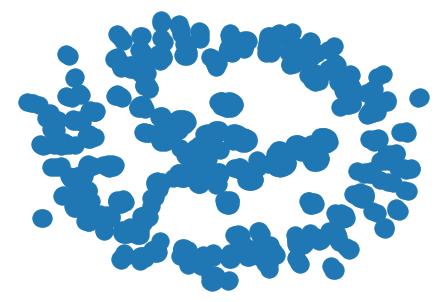

In [22]:
### A first preview of the network:
nx.draw(g)

This is due to the data being largely fragmentary and incomplete; we should concern ourselves with the largest component of the network only

In [23]:
# # Connected_component_subgraphs() returns a list of components, 
# # sorted largest to smallest

components= nx.connected_components(g)  ### A generator of sets of nodes, one for each component of G
# components=max(nx.connected_components(g), key=len) ### Getting the the largest connected component

In [24]:
# To create the induced subgraph of each component use:

S = [g.subgraph(c) for c in components]

In [25]:
# # Get positions for the nodes in G
pos_ = nx.spring_layout(g)    ### ??????????????? Is this helpfull

In [26]:
pos_

{'taylor-m': array([-0.50089759, -0.37604904]),
 'sara.shackleton@enron.com, mark.taylor@enron.com, carol.clair@enron.com, \n\ttana.jones@enron.com, brent.hendry@enron.com, mary.cook@enron.com, \n\tstephanie.panus@enron.com, cheryl.nelson@enron.com, \n\tfrancisco.leite@enron.com, frank.sayre@enron.com, \n\tangela.davis@enron.com, anne.koehler@enron.com': array([-0.53259152, -0.37761155]),
 'haedicke-m': array([-0.24352287,  0.70535493]),
 'barry.pearce@enron.com, wes.colwell@enron.com, lisa.mellencamp@enron.com, \n\te..haedicke@enron.com, michael.krautz@enron.com': array([-0.25226268,  0.73741311]),
 'shively-h': array([-0.1370454 ,  0.40987092]),
 'andrew.lewis@enron.com': array([-0.15142035,  0.43126881]),
 'lavorato-j': array([-0.01060795,  0.18503052]),
 'bob.crane@enron.com': array([-0.01456439,  0.19992639]),
 'horton-s': array([-0.60608464,  0.35926366]),
 'daniel.allegretti@enron.com, ray.alvarez@enron.com, nancy.bagot@enron.com, \n\tmartha.benner@enron.com, eric.benson@enron.c

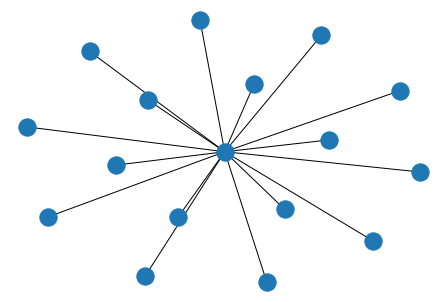

In [27]:
nx.draw(S[1])
# nx.draw(S[2])

### How can I interpret this plot?
#What is it representing each node?

/home/becode/anaconda3/envs/NLP/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/becode/anaconda3/envs/NLP/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


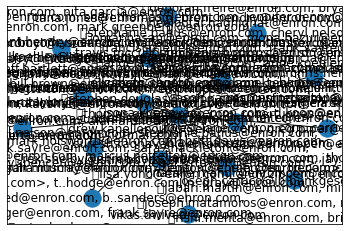

In [28]:
nx.draw_networkx(S[0], with_labels=True)   ##"Not helpful"

In [29]:
# How many netkwork graphs do I have? Are you sure is that what S represents?
len(S)

112

In [30]:
# for element in pos_:
#     print(element)

In [31]:
#### Create nodes to plot:

G = g

node_x = []
node_y = []

for count, node in enumerate(G.nodes()):
    x, y = pos_[node]
    node_x.append(x)
    node_y.append(y)


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Portland',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

### Create edges to plot:

edge_x = []
edge_y = []

for edge in G.edges():
    
    weight_edges = G.edges()[edge]['weight']

    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width= 0.3*weight_edges, color='#888'),   ###Define the line connecting nodes
    hoverinfo='none',
    mode='lines')

In [32]:
node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(G.adjacency()):
    
    node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1]))) ###Shows the #of connections
    node_text.append('#Connection: '+str(adjacencies[0]))


node_trace.marker.color = node_adjacencies    #### Color or size???? trace.marker.color or .size
node_trace.text = node_text

In [33]:
### Create Network Graph:

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Testing Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="1,2,3 Testing",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [34]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1]))) ###Shows the #of connections
    node_text.append('#Connection: '+str(adjacencies[0]))


node_trace.marker.size = node_adjacencies    #### Color or size???? trace.marker.color or .size
node_trace.text = node_text

### Create Network Graph:

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Testing Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="1,2,3 Testing",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()




In [35]:
#### Create nodes to plot:

components= nx.connected_components(g)  ### A generator of sets of nodes, one for each component of G
# components=max(nx.connected_components(g), key=len) ### Getting the the largest connected component

s = [g.subgraph(c) for c in components]    #sets of nodes
      
G = s

node_x = []
node_y = []

###################
text ='1 2 3 TESTING'
# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = '#488'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
###############################

for count, node in enumerate(G[0].nodes()):
    x, y = pos_[node]
    node_x.append(x)
    node_y.append(y)


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

### Create edges to plot:

edge_x = []
edge_y = []
edge_trace = [] #For each edge, make an edge_trace, append to list

poi = 0 

for edge in G[poi].edges():
    
    weight_edge = G[poi].edges()[edge]['weight']
    
#     if G[poi].edges()[edge]['weight'] > 1:

    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    
##################
    trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                               width = 0.2*weight_edge**1.1)
    edge_trace.append(trace)
##################

    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
##########################################################################""

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G[poi].adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(' '+str(adjacencies[0]))


node_trace.marker.color = node_adjacencies    #### Color or size???? trace.marker.color or .size
node_trace.text = node_text



#################
# Customize layout
layout = go.Layout(
#     paper_bgcolor='rgba(0,0,0,0)', # transparent background
#     plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
################

### Create Network Graph:

# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()


### The bubbles have the size according with the number of total email connections